## Data normalize and one hot labeling

In [108]:
import numpy as np
from fashion_mnist_dataset.utils import mnist_reader
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#get dataset
X_train, Y_train = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion',kind='train')
X_test, Y_test = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion',kind='t10k')


#storing all boot and Tshirt pictures and its corresponding labels.
X_boot_tshirt = []
Y_boot_tshirt = []
for i in range(len(Y_train)):
    #if label is 9, we append the picture, giving it new label 1.
    if Y_train[i] == 9:
        X_boot_tshirt.append(X_train[i,:])
        Y_boot_tshirt.append(1)
    #if label is 0, we append the picture and giving it label 0
    elif Y_train[i] == 0:
        X_boot_tshirt.append(X_train[i,:])
        Y_boot_tshirt.append(Y_train[i])
  
Y_boot_tshirt = np.array(Y_boot_tshirt).reshape((len(Y_boot_tshirt),1))
X_boot_tshirt = np.array(X_boot_tshirt)



X_pullover_coat = []
Y_pullover_coat = []
for i in range(len(Y_train)):
    #if label is 9, we append the picture, giving it new label 1.
    if Y_train[i] == 2:
        X_pullover_coat.append(X_train[i,:])
        Y_pullover_coat.append(1)
    #if label is 0, we append the picture and giving it label 0
    elif Y_train[i] == 4:
        X_pullover_coat.append(X_train[i,:])
        Y_pullover_coat.append(0)
  
Y_pullover_coat = np.array(Y_pullover_coat).reshape((len(Y_pullover_coat),1))
X_pullover_coat = np.array(X_pullover_coat)





In [109]:
print("X boot tshirt type and size :",type(X_boot_tshirt),X_boot_tshirt.shape)
print("Y boot tshirt type and size :",type(Y_boot_tshirt),Y_boot_tshirt.shape)
print("X pullover coat type and size :",type(X_pullover_coat),X_pullover_coat.shape)
print("Y pullover coat type and size :",type(Y_pullover_coat),Y_pullover_coat.shape)

X boot tshirt type and size : <class 'numpy.ndarray'> (12000, 784)
Y boot tshirt type and size : <class 'numpy.ndarray'> (12000, 1)
X pullover coat type and size : <class 'numpy.ndarray'> (12000, 784)
Y pullover coat type and size : <class 'numpy.ndarray'> (12000, 1)


In [133]:
def normalize_axis(vect):
    ma = max(vect)
    mi = min(vect)
    if ma-mi == 0:
        pass
    else:
        vect = (vect-mi)/(ma-mi)
    return vect
X_train_boot_tshirt_norm = np.apply_along_axis(normalize_axis, 0, X_boot_tshirt)

X_train_pullover_coat_norm = np.apply_along_axis(normalize_axis, 0, X_pullover_coat)

X_train_norm = np.apply_along_axis(normalize_axis, 0, X_train)

In [134]:
print("X normalized: ",X_train_boot_tshirt_norm.shape)
print("X normalized: ",X_train_pullover_coat_norm.shape)
print("X normalized: ",X_train_norm.shape)


X normalized:  (12000, 784)
X normalized:  (12000, 784)
X normalized:  (60000, 784)


In [135]:
def PCA(A):
    mean = np.mean(A,0)
    A_mean = A-mean
    A_mean_T = A_mean.transpose()
    n = A_mean.shape[0]
    C=np.matmul(A_mean_T,A_mean)/(n-1)
    eigenVal,eigenVect = np.linalg.eigh(C)
    return eigenVect



eig = PCA(X_train_boot_tshirt_norm)
eig_pull = PCA(X_train_pullover_coat_norm)
eig_whole = PCA(X_train_norm)

In [136]:
print("EigenVector of Cov matrix: ", eig.shape)
print("EigenVector of Cov matrix: ", eig_pull.shape)
print("EigenVector of Cov matrix: ", eig_whole.shape)

EigenVector of Cov matrix:  (784, 784)
EigenVector of Cov matrix:  (784, 784)
EigenVector of Cov matrix:  (784, 784)


## PCA plotting (1)

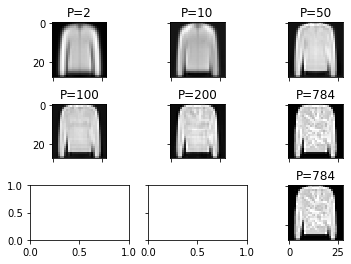

In [139]:
recon2 = np.matmul(eig_pull[:,-2:],eig_pull[:,-2:].transpose())
recon10 = np.matmul(eig_pull[:,-10:],eig_pull[:,-10:].transpose())
recon50 = np.matmul(eig_pull[:,-50:],eig_pull[:,-50:].transpose())
recon100 = np.matmul(eig_pull[:,-100:],eig_pull[:,-100:].transpose())
recon200 = np.matmul(eig_pull[:,-200:],eig_pull[:,-200:].transpose())
recon784 = np.matmul(eig_pull[:,-784:],eig_pull[:,-784:].transpose())

test_pic = X_train_pullover_coat_norm[5]

test_pic2 = np.matmul(test_pic, recon2)
test_pic10 = np.matmul(test_pic, recon10)
test_pic50 = np.matmul(test_pic, recon50)
test_pic100 = np.matmul(test_pic, recon100)
test_pic200 = np.matmul(test_pic, recon200)
test_pic784 = np.matmul(test_pic, recon784)


fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(test_pic2.reshape((28,28)), cmap='gray')
axs[0, 0].set_title('P=2')
axs[0, 1].imshow(test_pic10.reshape((28,28)), cmap='gray')
axs[0, 1].set_title('P=10')
axs[0, 2].imshow(test_pic50.reshape((28,28)), cmap='gray')
axs[0, 2].set_title('P=50')
axs[1, 0].imshow(test_pic100.reshape((28,28)), cmap='gray')
axs[1, 0].set_title('P=100')
axs[1, 1].imshow(test_pic200.reshape((28,28)), cmap='gray')
axs[1, 1].set_title('P=200')
axs[1, 2].imshow(test_pic784.reshape((28,28)), cmap='gray')
axs[1, 2].set_title('P=784')
axs[2, 2].imshow(test_pic.reshape((28,28)), cmap='gray')
axs[2, 2].set_title('Original Image')
plt.subplots_adjust(hspace=0.5)
 

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig('./fia.jpg')

## PCA plotting (2)

In [531]:
class LogRegression(): 
    __batch_size = 0
    
    def __init__(self, X_train, Y_train,lr,epoches,k):
        self.X_train = X_train
        self.Y_train= Y_train
        self.lr = lr
        self.epoches = epoches
        self.w = np.zeros((X_train.shape[1],1))
        self.k = k
        
    #split the train data into K batches. 
    def batch(self):
        self.X_train = np.vsplit(self.X_train,self.k)
        self.Y_train = np.split(self.Y_train,self.k)
        self.batch_size = self.X_train[0].shape[0]
    
    @staticmethod
    def sigmoid(x):
        return 1/(1 + np.exp(-x))
    
      def __input(self,x,w):
        return np.dot(x,w)
    
    def y_predict(self,x,w):
        return self.sigmoid(self.__input(x,w))

    def loss(self,y_train,w,x,batch_size):
        sum = 0
        for i in range(batch_size):
            part1 = y_train[i]*np.log(self.y_predict(x[i,:],w))
            part2 = (1-y_train[i])*np.log(1-np.log(self.y_predict(x[i,:],w)))
            sum = part1+part2
        sum = -1*sum
        return sum
    
    
    def loss_gradient(self,y_train,w,X,batch_size):
        diff = y_train - self.y_predict(x,w)
        print(diff)
        gradient = np.dot(x.transpose(),diff)
        return gradient
    
            
model = LogRegression(X_train_boot_tshirt_norm,np.array(Y_boot_tshirt),3,0.01,10)




model.batch()

print(len(model.X_train))




10


In [593]:

train = model.X_train
train = np.dot(train,eig)
    
for i in range(model.k):
    val_set = train[i]
    train_set = [ train[x] for x in range(len(train)) if x != i]
    train_set = np.concatenate(train_set) 
    for i in range(model.epoches):
        model.train()
    

